# Titanic EDA + Survival Prediction with most ML Models

## **Aim of this notebook is to predict who would've survived the Titanic?**


## **This notebook goes through some of the exploratory data analysis of the Kaggle Titanic dataset with Python.**


### Step 1: Import all the relevant dependencies and libraries

In [57]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# Import Dependencies
%matplotlib inline

# Import Visualization 
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Step 2: Acquire and view train and test datasets

In [58]:
# Acquiring the training and testing datasets into Pandas DataFrames
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_gs = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

# Training dataset preview.
df_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [59]:
# Test dataset preview
df_test.head(15)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [60]:
#gender submission dataset preview, this is the example of the submisison dataframe
df_gs.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### **Data Dictionary**
* Survival: No = 0, Yes = 1

* Pclass (Ticket class) - A proxy for socio-economic status (SES) <br>
    1st = Upper<br>
    2nd = Middle<br>
    3rd = Lower

* Sex: Sex (Male & Female)

* Age: Age in years

* Sibsp: Number of siblings/spouses aboard

* Parch: number of parents/children aboard <br>
Parch=0 for the children travelled only with a nanny

* Ticket: Ticket number

* Fare: Passenger fare

* Cabin: Cabin number

* Embarked: Port of Embarkation<br>
    C = Cherbourg<br>
    Q = Queenstown<br>
    S = Southampton


### Setp 3: Lets find out what train and test dataset contains.

In [61]:
print("----"* 15)
print('Train dataset info')
print("----"* 15)
df_train.info()
print("----"* 15)
print('Test dataset info')
print("----"* 15)
df_test.info()

------------------------------------------------------------
Train dataset info
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------------------------------------------------------
Test dataset info
------------------------

#### Train dataset contain 891 rows and 12 columns with data-type of int, float and object.

#### Test dataset contain 418 rows and 11 columns with data-type of int, float and object. Survived column is not available in the test dataset.

### Step 4: Finding the missing values of the train dataset

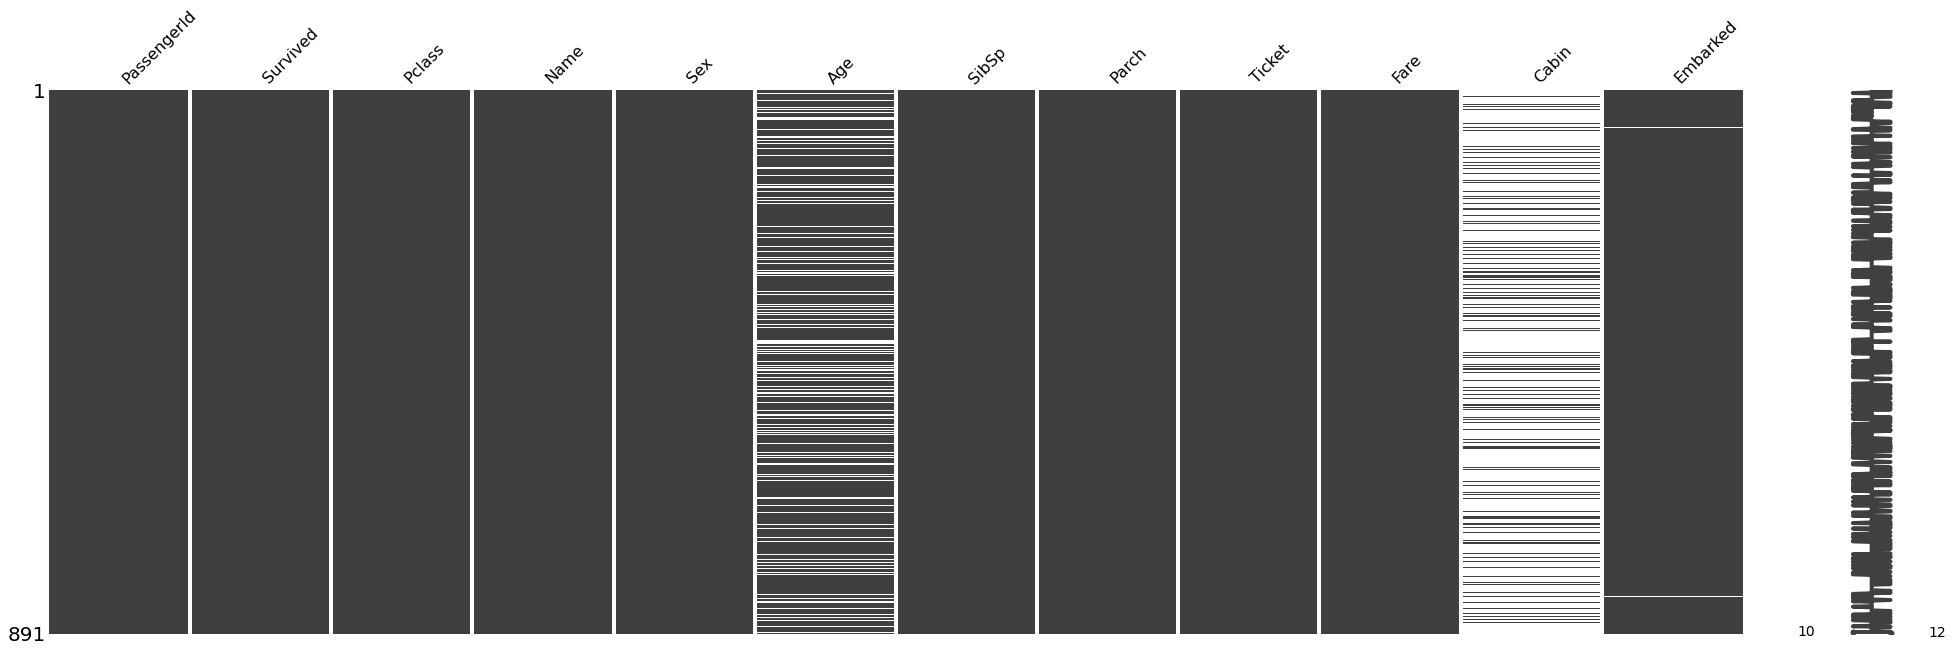

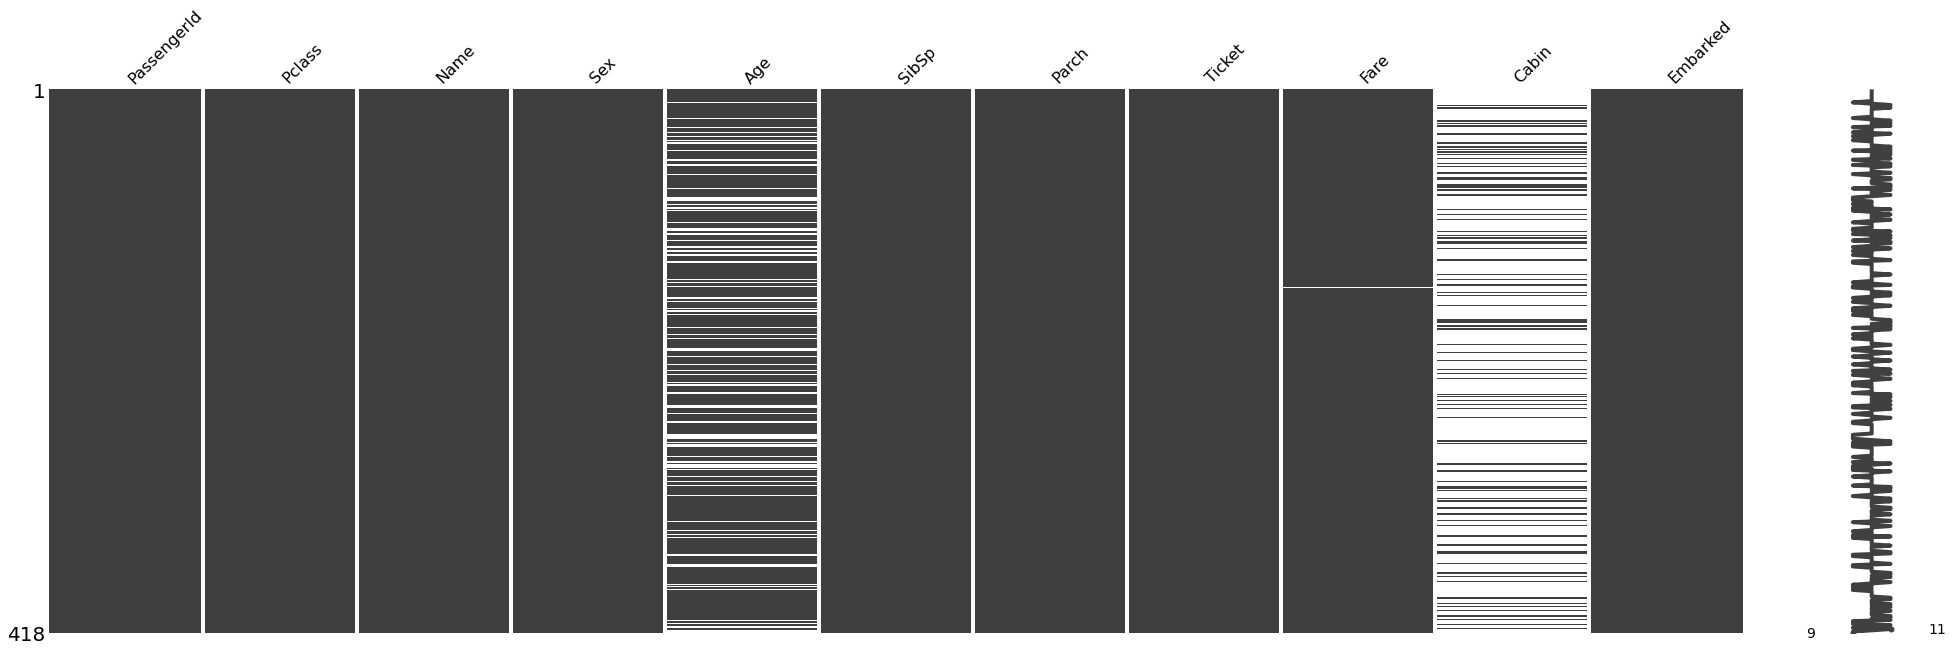

In [62]:
# Plot graphic of missing values
msno.matrix(df_train, figsize = (30,10))
msno.matrix(df_test, figsize = (30,10))

#### We can clearly see some missing values from the graph, cabin column has a lot of missing values and the Age is next.

In [63]:
#Counting the number of missing values
print("----"* 15)
print('The number of missing values in Train dataset')
print("----"* 15)
print(df_train.isnull().sum())

print("----"* 15)
print('The number of missing values in Test dataset')
print("----"* 15)

print(df_test.isnull().sum())

------------------------------------------------------------
The number of missing values in Train dataset
------------------------------------------------------------
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------------------------------------
The number of missing values in Test dataset
------------------------------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### In training dataset 687 values are missing from Cabin data, 177 values are missing from Age data and 2 values are missing from Embarked data.

#### In testing dataset 327 values are missing from Cabin data, and 86 values are missing from Age data.

In [64]:
# Analyzing both numeric and object series excluding NaN values.
df_train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Barah, Mr. Hanna Assi",male,1601,B96 B98,S
freq,1,577,7,4,644


#### Take away from above table.
* Names are unique across the dataset
* Sex variable as two possible values with 65% male (freq=577/count=891).
* Cabin values have several dupicates across samples, which means several passengers shared a cabin.
* Embarked takes three possible values. Southampton port used by most passengers
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

### Step 5: Following Assumptions made based on Data Analysis.

We arrive at following assumptions based on data analysis done so far.

**Correlating.**
Lets findout how well does each feature correlate with Survival.

**Completing.**

We will be completing
* Age feature as it is definitely correlated to survival.
* Embarked feature as it may also correlate with survival.
* Sex feature as it is definitely correlated to survival.

**Correcting.**

* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates >22% and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.

**Creating.**

* Creating new feature called Family based on Parch and SibSp to get total count of family members on board.
* Extracting titles from the Name feature
* Creating new feature for Age bands to form a ordinal categorical feature.
* Creating a Fare range feature to check if it helps our analysis.

### Step 6: Analyzing and visualizing data by pivoting features.

#### Analysing Pclass Vs Survived.

In [65]:
# Checking Correlation between Pclass and Survived.
# df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# above line of code just group by Pclass

pclass1 = df_train[df_train.Pclass == 1]['Survived'].value_counts(normalize=True).values[0]*100
pclass2 = df_train[df_train.Pclass == 2]['Survived'].value_counts(normalize=True).values[1]*100
pclass3 = df_train[df_train.Pclass == 3]['Survived'].value_counts(normalize=True).values[1]*100

print("Correlation between Pclass (Ticket class) and Survived!\n")
print("Pclaas 1 (Upper): {:.1f}% People Survived".format(pclass1))
print("Pclaas 2 (Middle): {:.1f}% People Survived".format(pclass2))
print("Pclaas 3 (Lower): {:.1f}% People Survived".format(pclass3))

print("\nThere is a significant correlation > {:.1f}% among Pclass = 1 (Upper) and Survived".format(pclass1))

Correlation between Pclass (Ticket class) and Survived!

Pclaas 1 (Upper): 63.0% People Survived
Pclaas 2 (Middle): 47.3% People Survived
Pclaas 3 (Lower): 24.2% People Survived

There is a significant correlation > 63.0% among Pclass = 1 (Upper) and Survived


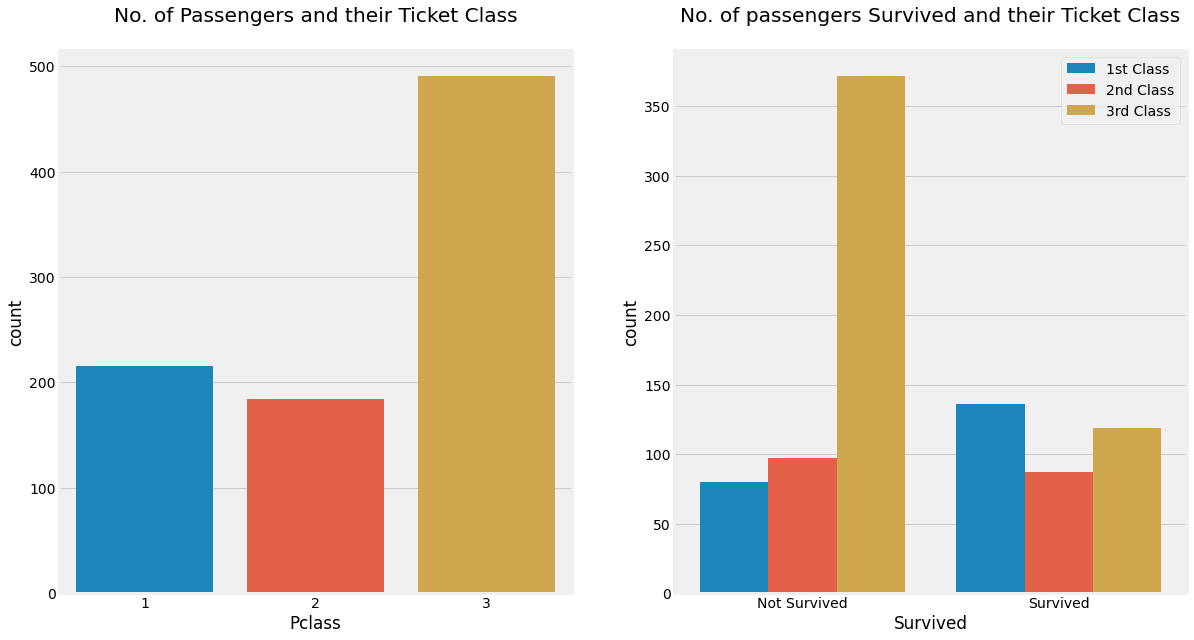

In [66]:
plt.figure(figsize=(18,10))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(df_train['Pclass'])
plt.title('No. of Passengers and their Ticket Class\n');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Pclass", data=df_train)
plt.title('No. of passengers Survived and their Ticket Class\n')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])
plt.legend(('1st Class','2nd Class','3rd Class'),loc = 'best')

#### Analysing Sex Vs Survived.

In [67]:
# Checking Correlation between Sex and Survived.
df_train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


([<matplotlib.axis.XTick at 0x7fe83cdb3890>,
 [Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')])

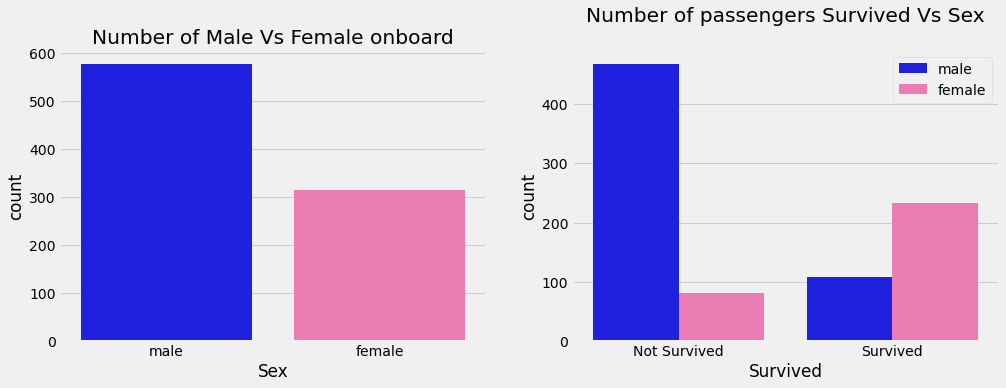

In [68]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['Sex'],palette=("#0000FF","#FF69B4"))
plt.title('Number of Male Vs Female onboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Sex", data=df_train,palette=("#0000FF","#FF69B4"))
plt.legend(loc='top')
plt.title('Number of passengers Survived Vs Sex\n')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])

In [69]:
# This code represents above graph in a different format
# male = df_train[df_train.Sex=="male"].Sex
# female = df_train[df_train.Sex=="female"].Sex
# survived_male = df_train[df_train.Survived==1].Sex[df_train.Sex=="male"]
# survived_female = df_train[df_train.Survived==1].Sex[df_train.Sex=="female"]

# plt.figure(figsize=(18,10))
# plt.subplot(1,2,1)
# plt.title("Number of Male Vs Female onboard")
# plt.ylim(0,800)
# plt.bar("Female",female.size, width = 0.3)
# plt.text("Female",female.size+10,female.size)
# plt.bar("Male",male.size, width = 0.3)
# plt.text("Male",male.size+10,male.size)

# plt.subplot(1,2,2)
# plt.title("Number of Male Vs Female Survived")
# plt.ylim(0,400)
# plt.bar("Survived Female",survived_female.size, width = 0.3)
# plt.text("Survived Female",survived_female.size+10,survived_female.size)
# plt.bar("Survived Male",survived_male.size, width = 0.3)
# plt.text("Survived Male",survived_male.size+10,survived_male.size)

# plt.show()

There is a significant correlation > 74% among Sex = female and Survived

#### Analysing Age distribution.

Text(0.5, 0, 'Age')

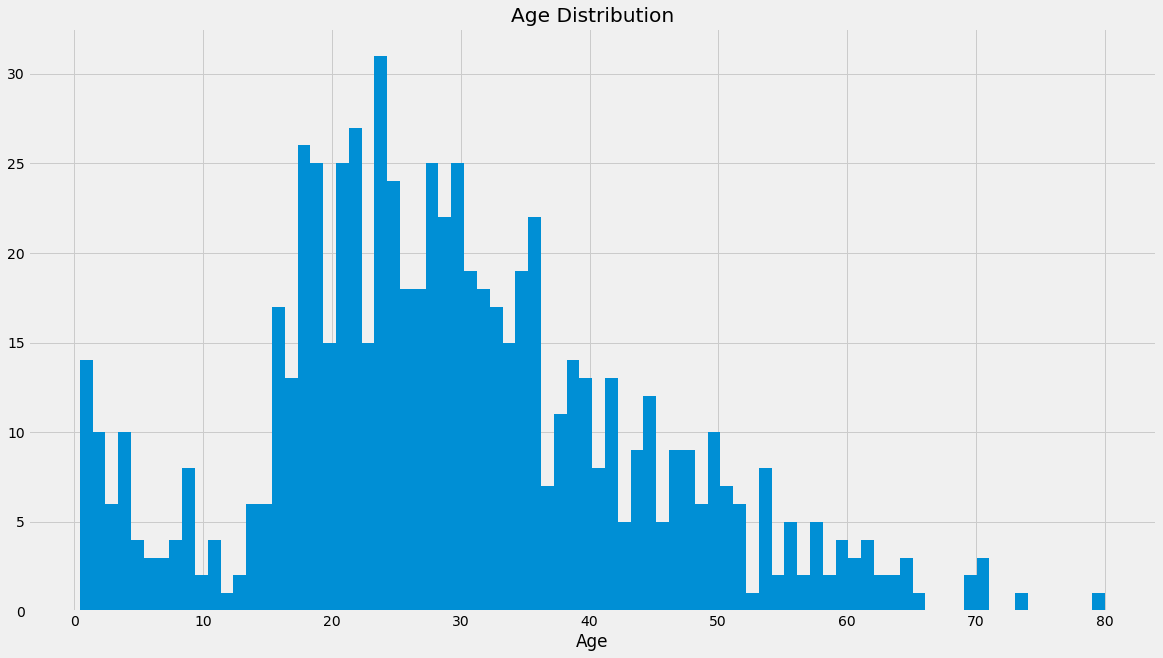

In [70]:
#Age Distribution
plt.figure(figsize=(18,10))
df_train['Age'].hist(bins=80)
plt.title('Age Distribution')
plt.xlabel('Age')

Age column data contains many outliers.

#### Analysing Age Vs Survived.

Text(16.02540972222223, 0.5, 'Frequency')

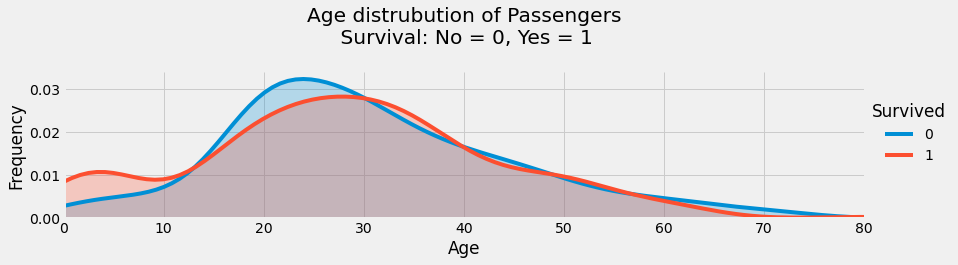

In [71]:
sns.FacetGrid(df_train, hue="Survived",aspect=4)\
.map(sns.kdeplot,'Age',shade= True)\
.set(xlim=(0, df_train['Age'].max()))\
.add_legend()

plt.title('Age distrubution of Passengers\n Survival: No = 0, Yes = 1\n')
plt.ylabel('Frequency')

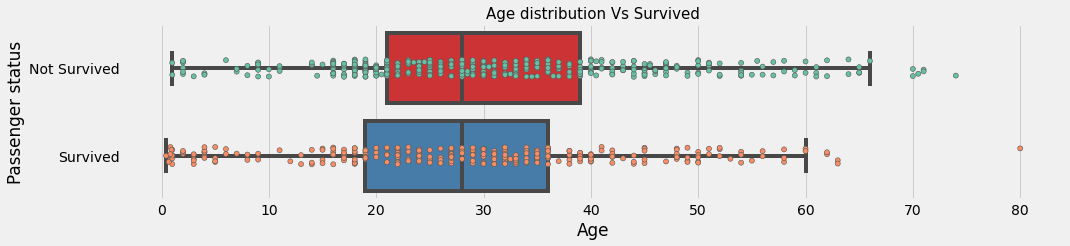

In [72]:
plt.figure(figsize=(15, 3))

#Age distributions Vs survival status.
sns.boxplot(y = 'Survived', x = 'Age', data = df_train,
     palette="Set1", fliersize = 0, orient = 'h')

# Add a scatterplot for each category.
sns.stripplot(y = 'Survived', x = 'Age', data = df_train,
     linewidth = 0.6, palette= "Set2", orient = 'h')

plt.yticks( np.arange(2), ['Not Survived', 'Survived'])
plt.title('Age distribution Vs Survived',fontsize= 15)
plt.ylabel('Passenger status')
plt.show()

#### Grouping people based on their age to see how many of which age group survived.

In [73]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Analysing Siblings/Spouses Vs Survived.

In [74]:
df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


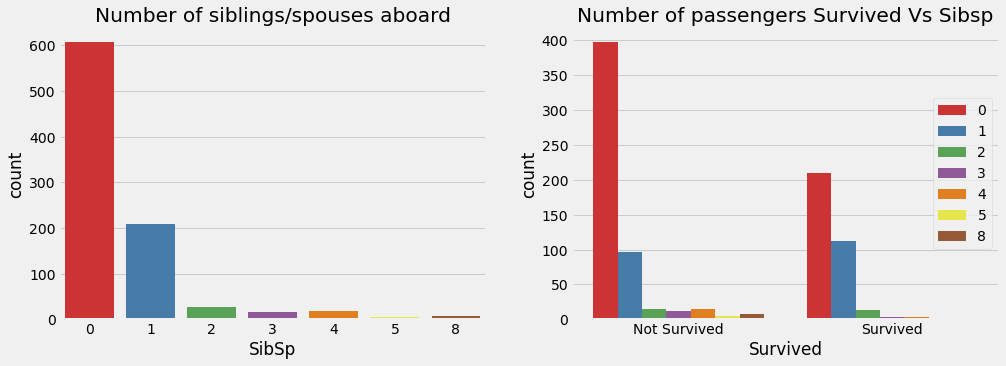

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['SibSp'],palette="Set1")
plt.title('Number of siblings/spouses aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="SibSp", data=df_train,palette="Set1")
plt.legend(loc='right')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])
plt.title('Number of passengers Survived Vs Sibsp');

Survival rate is high for people with family.



#### Analysing Parch(number of parents/children aboard) Vs Survived.

In [76]:
df_train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


([<matplotlib.axis.XTick at 0x7fe82c059c50>,
 [Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')])

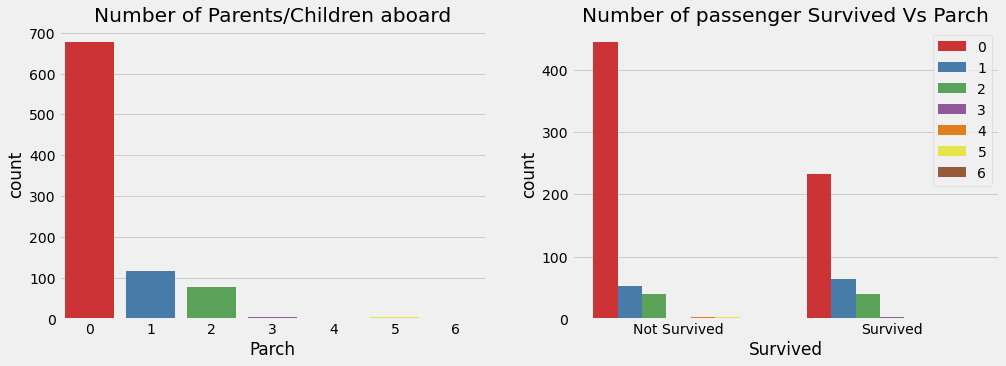

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['Parch'],palette="Set1")
plt.title('Number of Parents/Children aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Parch", data=df_train,palette="Set1")
plt.legend(loc='top')
plt.title('Number of passenger Survived Vs Parch')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])

#### Analysing Port of Embarkation vs Survived

([<matplotlib.axis.XTick at 0x7fe827f2d290>,
 [Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')])

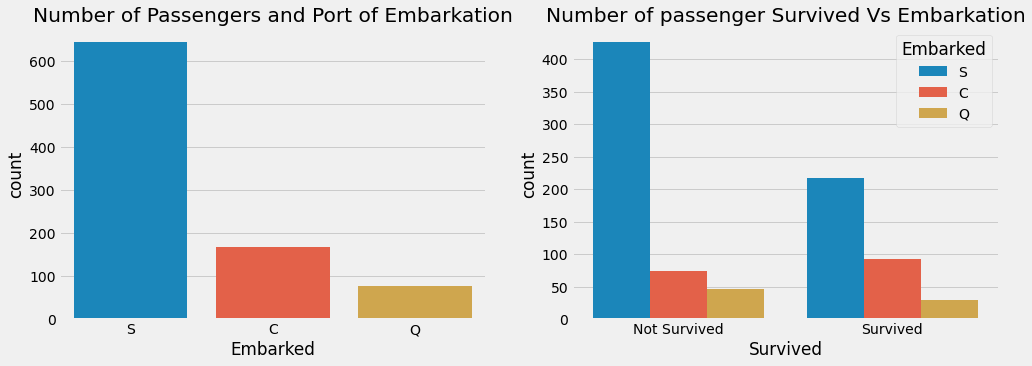

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['Embarked'])
plt.title('Number of Passengers and Port of Embarkation');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Embarked", data=df_train)
#plt.legend("Southampton" "Cherbourg" "Queenstown",loc='top')
plt.title('Number of passenger Survived Vs Embarkation')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])

#### Analysing Fare vs Embarked



Text(0.5, 1.0, 'Distribution of Fare Vs Embarked\n')

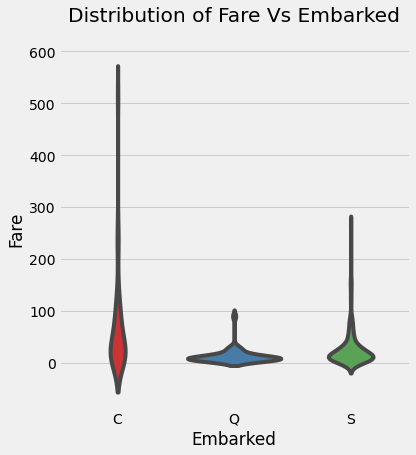

In [79]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=df_train, height = 6, order = ['C', 'Q', 'S'],palette="Set1")
plt.title('Distribution of Fare Vs Embarked\n')

Many 1st Class and 3rd Class passengers boarded the the ship at Cherbourg, hence the wider fare distribution among passengers can be noticed.

The smallest variation in the price of passengers who boarded in Queenstown.

Embarked: Port of Embarkation
C = Cherbourg
Q = Queenstown
S = Southampton

#### Analysing Fare vs Pclass

Text(0.5, 1.0, 'Distribution of Fare Vs Ticket class \n Survival: No = 0, Yes = 1\n')

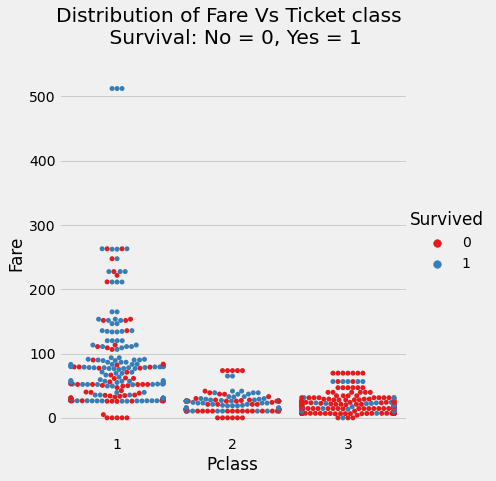

In [80]:
sns.catplot(x="Pclass", y="Fare",  hue = "Survived", kind="swarm", data=df_train, 
                                    palette="Set1", height = 6)
plt.title('Distribution of Fare Vs Ticket class \n Survival: No = 0, Yes = 1\n')


Price distribution for 2nd and 3rd Class passengers are identical. The fare distribution of 1st Class passengers is significantly wider.

### Step 7: Analyzing and visualizing data by pivoting features.

1. Percentage of people who survived is 38.19%.
2. 74% of all females survived. Female passengers had much better survival rate than males
3. All the old age people (whose age>59) survived, and more than 50% of kids (whose age<13) were more likely to have survived..
4. Survival Rate (Passenger-Class wise) = Upper > Middle > Lower class. The upper-class passengers (Pclass=1) were more likely to have survived.

<Figure size 1440x1440 with 0 Axes>

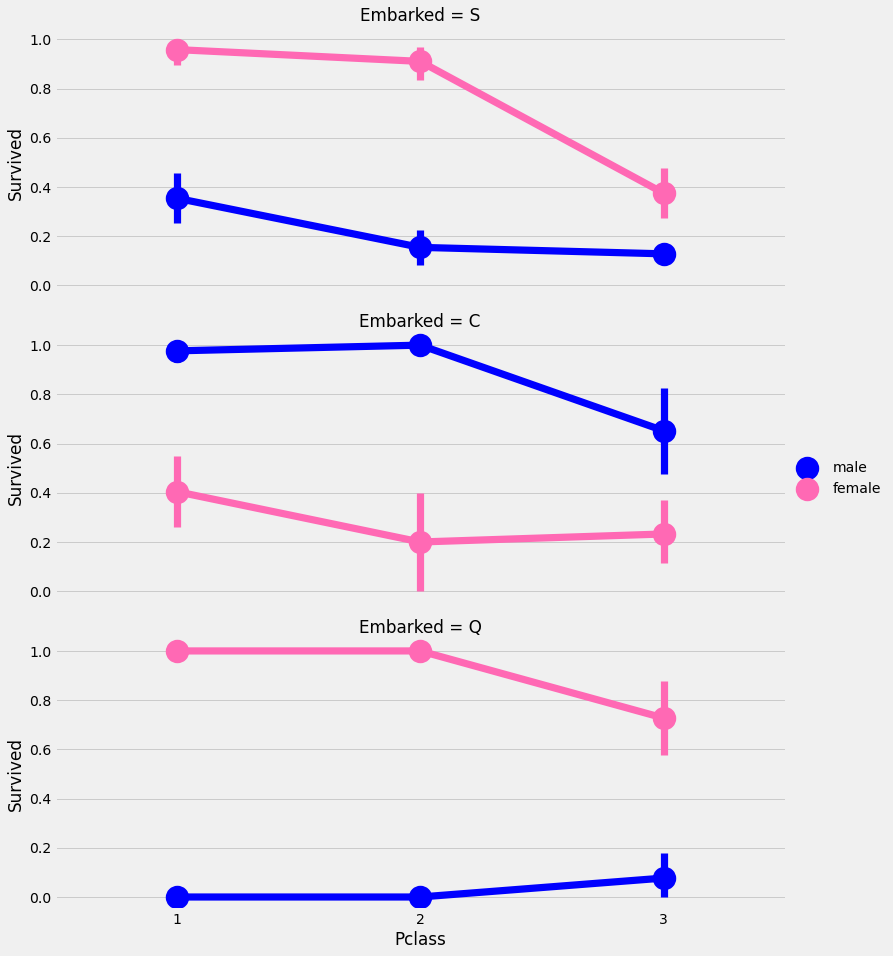

In [81]:
plt.figure(figsize=(20,20))
grid = sns.FacetGrid(df_train, row='Embarked', size=4.5, aspect=2.5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=("#0000FF","#FF69B4"))
grid.add_legend()

* Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.
* We should consider Age, Sex, Embarked and Title in our model training.

### Step 8: Understanding Correlation between variables

To decide which features to use for model, understanding how the features in a dataset interacts with each other is important.
To do so, we will utilise Pearson Correlation Heatmap.

Noise and inaccuracy is added by the correlated features and it will make harder to achieve the desired outcome. 

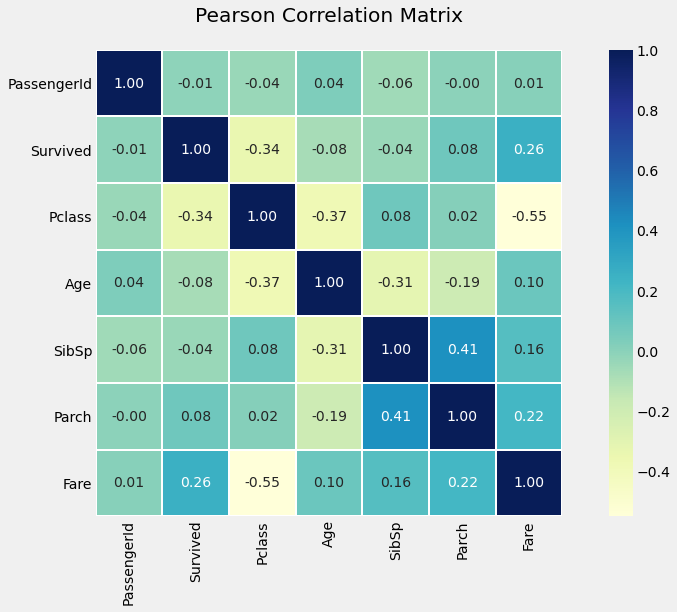

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(), annot=True, square = True, cmap="YlGnBu", linewidths=1, fmt= '.2f')
plt.title('Pearson Correlation Matrix\n');

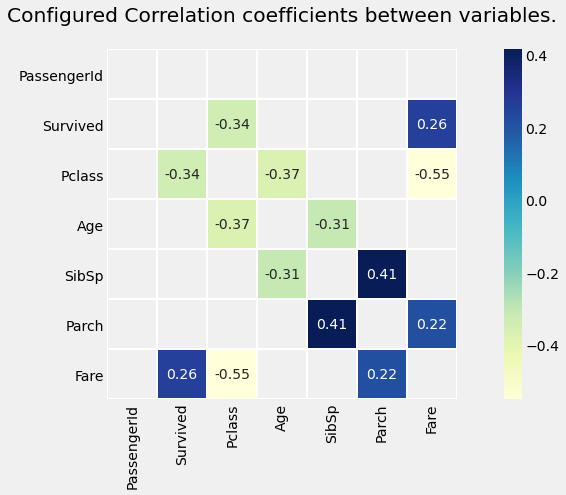

In [83]:
plt.figure(figsize=(15,6))
correl = df_train.corr()
sns.heatmap(correl[((correl >= 0.2) | (correl <= -0.2)) & (correl != 1)], annot=True, linewidths=1, fmt= '.2f', square = True, cmap="YlGnBu")
plt.title('Configured Correlation coefficients between variables.\n');

From the heatmap it is clear there is no correlation between variables.

Takeaway from the Plots

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information. Here are two most correlated features are that of Sibsp and Parch (Parents and Children). I'll still leave both features in for the purposes of this exercise.

### Step 9: Data Wrangling

**Correcting.**
So far we did not have to change a single feature or value to analyse. Now we will be correcting by dropping features.
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates >22% and there may not be a correlation between Ticket and survival.
* Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* PassengerId may be dropped from training dataset as it does not contribute to survival.

We will perform operations on both training and testing datasets together to stay consistent.


**Creating.**

* Creating new feature called Family based on Parch and SibSp to get total count of family members on board.
* Extracting tiles from the Name feature
* Creating new feature for Age bands to form a ordinal categorical feature.
* Creating a Fare range feature to check if it helps our analysis.


Children: Age<13
Teenagers: Age>12 and Age<20
Adults: Age>19 and Age<60
Aged people: Age>59


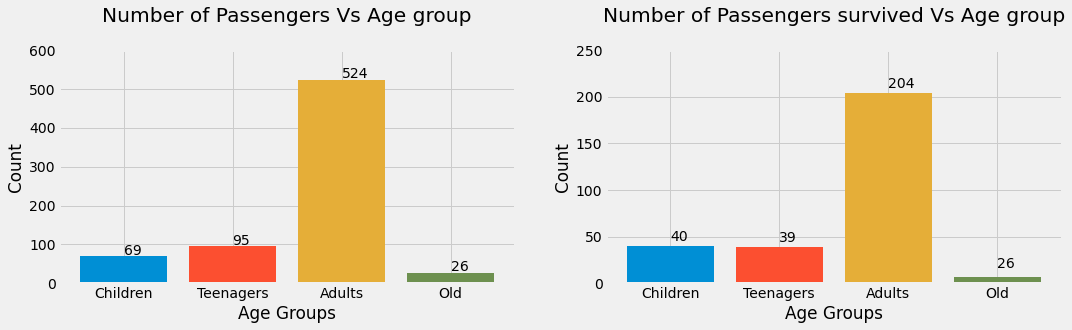

In [84]:
#Creating new feature for Age bands to form a ordinal categorical feature.

child = df_train.Age[df_train.Age<13]
print("Children: Age<13")
teen = df_train.Age[(df_train.Age>12) & (df_train.Age<20)]
print("Teenagers: Age>12 and Age<20")
adult = df_train.Age[(df_train.Age>19) & (df_train.Age<60)]
print("Adults: Age>19 and Age<60")
old= df_train.Age[df_train.Age>59]
print("Aged people: Age>59")

child_s = df_train[df_train.Survived==1].Age[df_train.Age<13]
teen_s = df_train[df_train.Survived==1].Age[(df_train.Age>12) & (df_train.Age<20)]
adult_s = df_train[df_train.Survived==1].Age[(df_train.Age>19) & (df_train.Age<60)]
old_s= df_train[df_train.Survived==1].Age[df_train.Age>59]

plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title("Number of Passengers Vs Age group\n")
plt.ylim(0,600)
plt.bar("Children",child.size)
plt.text("Children",child.size+5,child.size)
plt.bar("Teenagers",teen.size)
plt.text("Teenagers",teen.size+5,teen.size)
plt.bar("Adults",adult.size)
plt.text("Adults",adult.size+5,adult.size)
plt.bar("Old",old.size)
plt.text("Old",old.size+5,old.size)
plt.ylabel('Count')
plt.xlabel('Age Groups')

plt.subplot(1,2,2)
plt.title("Number of Passengers survived Vs Age group\n")
plt.ylim(0,250)
plt.bar("Children",child_s.size)
plt.text("Children",child_s.size+5,child_s.size)
plt.bar("Teenagers",teen_s.size)
plt.text("Teenagers",teen_s.size+5,teen_s.size)
plt.bar("Adults",adult_s.size)
plt.text("Adults",adult_s.size+5,adult_s.size)
plt.bar("Old",old_s.size)
plt.text("Old",old_s.size+10,old.size)
plt.ylabel('Count')
plt.xlabel('Age Groups')
plt.show()

#### Combining Parch and Sibsp to create a family group

In [85]:
#Creating new feature called Family based on Parch and SibSp to get total count of family members on board.
df_train['Family'] =  df_train["Parch"] + df_train["SibSp"]+1
df_test['Family'] =  df_test["Parch"] + df_test["SibSp"]+1

([<matplotlib.axis.XTick at 0x7fe827ba83d0>,
 [Text(0, 0, 'Not Survived'), Text(0, 0, 'Survived')])

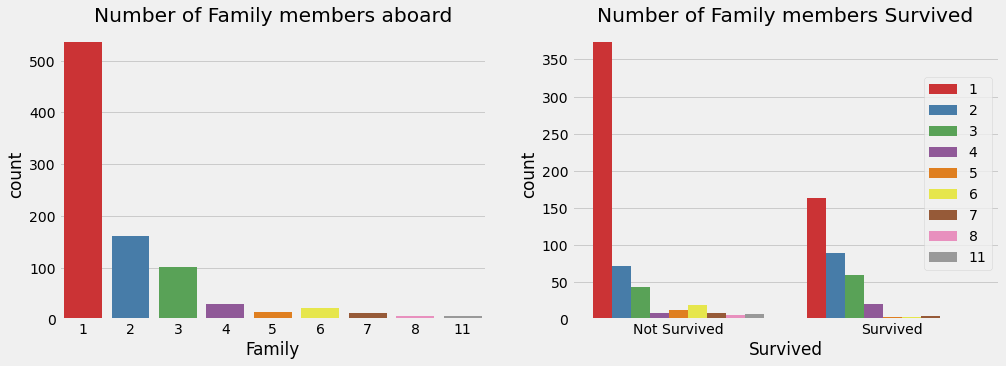

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['Family'],palette="Set1")
plt.title('Number of Family members aboard');

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Family", data=df_train,palette="Set1")
plt.legend(loc='right')
plt.title('Number of Family members Survived')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])

In [87]:
# Grouping all the family members into one bucket
df_train['Family Group'] = df_train['Family']
df_train['Family Group'].loc[df_train['Family Group'] > 0] = 1
df_train['Family Group'].loc[df_train['Family Group'] == 0] = 0

df_train[['Family Group', 'Survived']].groupby(['Family Group'], as_index=False).mean()

,Family Group,Survived
0,1,0.383838


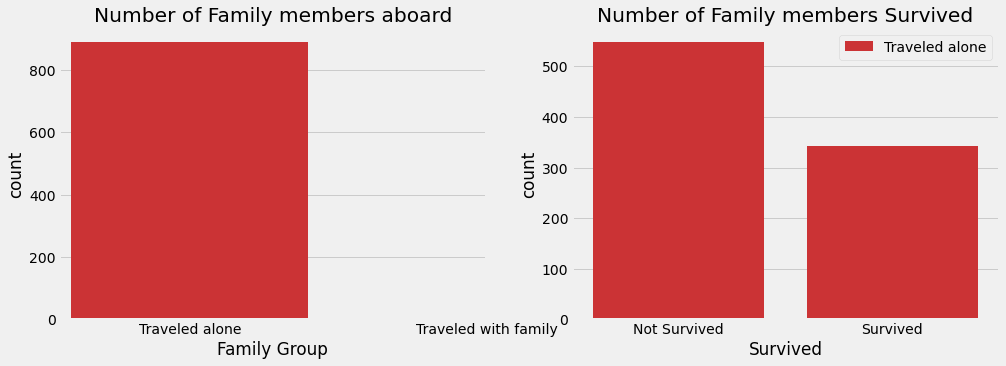

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['Family Group'],palette="Set1")
plt.title('Number of Family members aboard');
plt.xticks( np.arange(2), ['Traveled alone', 'Traveled with family'])

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Family Group", data=df_train,palette="Set1")
#plt.legend(loc='top')
plt.title('Number of Family members Survived')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])
plt.legend(('Traveled alone','Traveled with family'),loc = 'best')

This shows the survival rate is high for people with family.

In [89]:
# Grouping all the family members into one bucket
df_test['Family Group'] = df_test['Family']
df_test['Family Group'].loc[df_test['Family Group'] > 0] = 1
df_test['Family Group'].loc[df_test['Family Group'] == 0] = 0

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Family Group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3,1


#### Extracting tiles from the Name feature and grouping
Creating new feature by extracting from existing titles and testing correlation between titles and survival.

In [90]:
combine = [df_train, df_test]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Replace many titles with a common Classifier called as OtherTitles.

In [91]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'OtherTitles')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,OtherTitles,0.347826


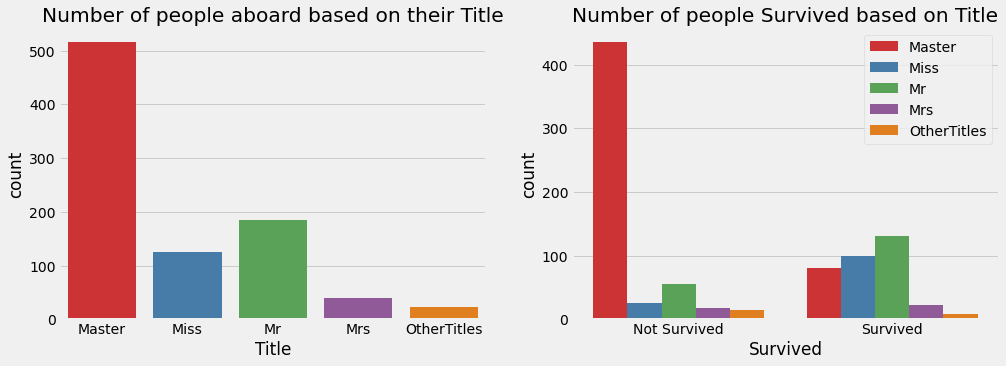

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df_train['Title'],palette="Set1")
plt.title('Number of people aboard based on their Title');
plt.xticks( np.arange(5), ['Master', 'Miss', 'Mr', 'Mrs', 'OtherTitles'])

plt.subplot(1,2,2)
sns.countplot(x="Survived", hue="Title", data=df_train,palette="Set1")
plt.title('Number of people Survived based on Title')
plt.xticks( np.arange(2), ['Not Survived', 'Survived'])
plt.legend(('Master', 'Miss', 'Mr', 'Mrs', 'OtherTitles'),loc = 'best')

Text(0.5, 1.0, 'Distribution of Age Vs Title \n Survival: No = 0, Yes = 1\n')

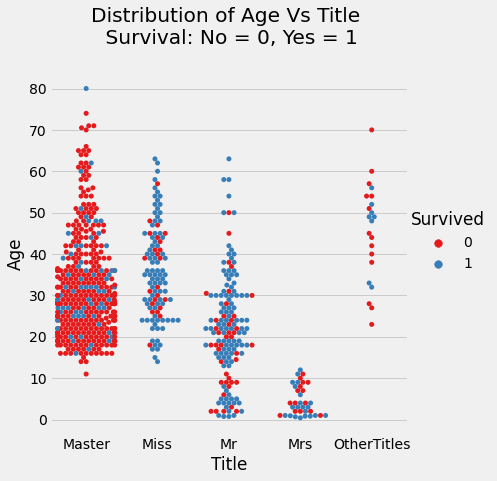

In [93]:
sns.catplot(x="Title", y="Age",  hue = "Survived", kind="swarm", data=df_train, 
                                    palette="Set1", height = 6)
plt.xticks( np.arange(5), ['Master', 'Miss', 'Mr', 'Mrs', 'OtherTitles'])

plt.title('Distribution of Age Vs Title \n Survival: No = 0, Yes = 1\n')

### Step 10: Data Cleaning.

Now we can safely drop the Name feature from training and testing datasets.
We also do not need the PassengerId,Ticket,Cabin feature in the training dataset.

In [94]:
#Droping unwanted data
df_train = df_train.drop(['Name', 'PassengerId','Ticket', 'Cabin',"Family",'SibSp', 'Parch'], axis=1)
df_test = df_test.drop(['Name','Ticket', 'Cabin',"Family",'SibSp', 'Parch'], axis=1)

combine = [df_train, df_test]
df_train.shape, df_test.shape


((891, 8), (418, 8))

### Step 11: Converting new feature to form a ordinal categorical feature.

In [95]:
#Converting the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "OtherTitles": 5}
sex_map = {'male' : 0, 'female' : 1}
embarked_map = {'S' : 0, 'C' : 1, 'Q' : 2}

for dataset in combine:
# Mapping Title
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

#converting Sex feature to a new feature called Gender where female=1 and male=0.
    dataset['Sex'] = dataset['Sex'].map(sex_map)

# Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map(embarked_map)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Group,Title
0,0,3,0,22.0,7.2500,0.0,1,1
1,1,1,1,38.0,71.2833,1.0,1,3
2,1,3,1,26.0,7.9250,0.0,1,2
3,1,1,1,35.0,53.1000,0.0,1,3
4,0,3,0,35.0,8.0500,0.0,1,1


### Step 12: Correlating categorical and numerical features.
Now we should start estimating and completing features with missing or null values.

We may also want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).


More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1.

In [96]:
# Completing the Age feature for null values.
# By preparing an empty array to contain guessed Age values based on Pclass x Gender combinations.
# Iterating over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations.

guess_ages = np.zeros((2,3))

for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

#Let us create Age bands and determine correlations with Survived.

df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [97]:
#Let us replace Age with ordinals based on these bands.
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

    
# Now we can remove the AgeBand feature.
df_train = df_train.drop(['AgeBand'], axis=1)
combine = [df_train, df_test]

In [98]:
# Completing a categorical feature
# Embarked feature takes S, Q, C values based on port of embarkation.
# Our training dataset has two missing values. We simply fill these with the most common occurance.

freq_port = df_train.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Embarked'] = dataset['Embarked'].astype(int)
    
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


In [99]:
# # Creating FareBand.
# df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)

# df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

In [100]:
# # Converting the Fare feature to ordinal values based on the FareBand
# #df_train['Fare'].fillna(df_train['Fare'].dropna().median(), inplace=True)

# for dataset in combine:
    
#     dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
#     dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
#     dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31.0), 'Fare'] = 2
#     dataset.loc[ dataset['Fare'] > 31.0, 'Fare'] = 3
#     dataset['Fare'] = dataset['Fare'].astype(int)

# combine = [df_train, df_test]

In [101]:
#df_train = df_train.drop(['FareBand'], axis=1)

In [102]:
# we can create an artificial feature combining Pclass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

df_train.loc[:, ['Age*Class', 'Age', 'Pclass']]

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
...,...,...,...
886,2,1,2
887,1,1,1
888,3,1,3
889,1,1,1


In [103]:
df_train.head(15)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family Group,Title,Age*Class
0,0,3,0,1,7.2500,0,1,1,3
1,1,1,1,2,71.2833,1,1,3,2
2,1,3,1,1,7.9250,0,1,2,3
3,1,1,1,2,53.1000,0,1,3,2
4,0,3,0,2,8.0500,0,1,1,6
5,0,3,0,1,8.4583,2,1,1,3
6,0,1,0,3,51.8625,0,1,1,3
7,0,3,0,0,21.0750,0,1,4,0
8,1,3,1,1,11.1333,0,1,3,3
9,1,2,1,0,30.0708,1,1,3,0


In [104]:
# We can now complete the Fare feature for single missing value in test dataset
# Using mode to get the value that occurs most frequently for this feature.
# We will round off the fare to two decimals as it represents currency.

df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)


In [105]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Family Group,Title,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,1,3,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,1,3,3


### Step 13: Model, predict and solve. Finding the best ML model
Model training and prediction to findout the required solution.
We will be  identify relationship between output (Survived or not) with other variables or features (Gender, Age, Embarked and so on)

This is a classification and regression problem.  We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. 
With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

In [106]:
# Creating Train and Test split of the df_Train dataset in order to find the best Classification Model.
X_train = df_train.drop(['Survived'], axis=1)
y_train = df_train['Survived']
X_test = df_test.drop('PassengerId', axis=1).copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [120]:
#Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable
#(feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.
#Reference Wikipedia.

#Note the confidence score generated by the model based on our training dataset.


# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
Y_pred = log_reg.predict(X_test)
acc_log = round(log_reg.score(X_train, y_train) * 100, 2)
acc_log

79.8

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

* Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
* Inversely as Pclass increases, probability of Survived=1 decreases the most.
* This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
* So is Title as second highest positive correlation.

In [121]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(log_reg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.165267
6,Title,0.362133
4,Embarked,0.279501
2,Age,0.253797
3,Fare,0.000566
5,Family Group,-0.061236
7,Age*Class,-0.277865
0,Pclass,-0.696819


In [110]:
# Support Vector Machines which are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.
# Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples
# to one category or the other, making it a non-probabilistic binary linear classifier. Reference Wikipedia.

# Note that the model generates a confidence score which is higher than Logistics Regression model.

# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.8

In [111]:
# the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression.
# A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors
# (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. Reference Wikipedia.

# KNN confidence score is better than Logistics Regression but worse than SVM.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.64

In [112]:
# This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves).
# Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class
# labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values
# (typically real numbers) are called regression trees. Reference Wikipedia.

# The model confidence score is the highest among models evaluated so far.

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.6

In [113]:
# In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes'
# theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable,
# requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia.

# The model generated confidence score is the lowest among the models evaluated so far.


# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

74.41

In [114]:
# The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input,
# represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e.
# a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.
# The algorithm allows for online learning, in that it processes elements in the training set one at a time. Reference Wikipedia.

# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

77.55

In [115]:
# Linear SVC

from sklearn.svm import SVC, LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

79.12

In [116]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

63.3

In [118]:
# Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification,
# regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class
# that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia.

# The model confidence score is the highest among models evaluated so far. We decide to use this model's output (Y_pred) for creating our competition submission of results.
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest


93.49

In [123]:
# AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm. It can be used in conjunction with many other types of learning algorithms 
# to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of
#the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.

from sklearn.ensemble import AdaBoostClassifier
AdaB = AdaBoostClassifier()
AdaB.fit(X_train, y_train)
Y_pred = AdaB.predict(X_test)
AdaB.score(X_train, y_train)
acc_AdaB = round(AdaB.score(X_train, y_train) * 100, 2)
acc_AdaB

84.18

In [128]:
# Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form
# of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do,
# and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

from sklearn.ensemble import GradientBoostingClassifier
Gard_Boost = GradientBoostingClassifier()
Gard_Boost.fit(X_train, y_train)
Y_pred = Gard_Boost.predict(X_test)
Gard_Boost.score(X_train, y_train)
acc_Gard_Boost = round(Gard_Boost.score(X_train, y_train) * 100, 2)
acc_Gard_Boost

89.56

In [133]:
from catboost import CatBoostClassifier
catboost_model = CatBoostClassifier()
catboost_model.fit(X_train, y_train)

# CatBoost accuracy
Y_pred = catboost_model.predict(X_test)
catboost_model.score(X_train, y_train)
acc_catboost = round(catboost_model.score(X_train, y_train) * 100, 2)
acc_catboost

Learning rate set to 0.009807
0:	learn: 0.6869404	total: 1.16ms	remaining: 1.16s
1:	learn: 0.6808818	total: 2.42ms	remaining: 1.21s
2:	learn: 0.6749217	total: 3.83ms	remaining: 1.27s
3:	learn: 0.6686599	total: 5.23ms	remaining: 1.3s
4:	learn: 0.6639565	total: 6.29ms	remaining: 1.25s
5:	learn: 0.6604470	total: 6.95ms	remaining: 1.15s
6:	learn: 0.6541663	total: 8.28ms	remaining: 1.17s
7:	learn: 0.6479241	total: 9.6ms	remaining: 1.19s
8:	learn: 0.6423792	total: 10.9ms	remaining: 1.2s
9:	learn: 0.6393785	total: 11.6ms	remaining: 1.15s
10:	learn: 0.6340935	total: 13ms	remaining: 1.17s
11:	learn: 0.6286861	total: 14.2ms	remaining: 1.17s
12:	learn: 0.6236030	total: 15.4ms	remaining: 1.17s
13:	learn: 0.6185691	total: 16.7ms	remaining: 1.18s
14:	learn: 0.6136562	total: 18ms	remaining: 1.18s
15:	learn: 0.6085831	total: 19.2ms	remaining: 1.18s
16:	learn: 0.6034618	total: 20.5ms	remaining: 1.19s
17:	learn: 0.5988269	total: 21.8ms	remaining: 1.19s
18:	learn: 0.5939716	total: 23.1ms	remaining: 1.19s

306:	learn: 0.3641630	total: 367ms	remaining: 828ms
307:	learn: 0.3639969	total: 369ms	remaining: 828ms
308:	learn: 0.3639643	total: 370ms	remaining: 826ms
309:	learn: 0.3638205	total: 371ms	remaining: 826ms
310:	learn: 0.3635640	total: 372ms	remaining: 825ms
311:	learn: 0.3635292	total: 373ms	remaining: 823ms
312:	learn: 0.3634197	total: 374ms	remaining: 822ms
313:	learn: 0.3632907	total: 376ms	remaining: 821ms
314:	learn: 0.3631659	total: 377ms	remaining: 820ms
315:	learn: 0.3630721	total: 378ms	remaining: 818ms
316:	learn: 0.3628669	total: 379ms	remaining: 817ms
317:	learn: 0.3627454	total: 380ms	remaining: 816ms
318:	learn: 0.3627177	total: 381ms	remaining: 814ms
319:	learn: 0.3626016	total: 383ms	remaining: 813ms
320:	learn: 0.3624753	total: 384ms	remaining: 812ms
321:	learn: 0.3624144	total: 385ms	remaining: 810ms
322:	learn: 0.3622968	total: 386ms	remaining: 809ms
323:	learn: 0.3622378	total: 387ms	remaining: 808ms
324:	learn: 0.3622055	total: 388ms	remaining: 806ms
325:	learn: 

599:	learn: 0.3365572	total: 737ms	remaining: 491ms
600:	learn: 0.3365008	total: 739ms	remaining: 490ms
601:	learn: 0.3364885	total: 740ms	remaining: 489ms
602:	learn: 0.3363561	total: 741ms	remaining: 488ms
603:	learn: 0.3362441	total: 742ms	remaining: 487ms
604:	learn: 0.3361028	total: 744ms	remaining: 485ms
605:	learn: 0.3360902	total: 744ms	remaining: 484ms
606:	learn: 0.3359750	total: 746ms	remaining: 483ms
607:	learn: 0.3358890	total: 747ms	remaining: 482ms
608:	learn: 0.3358291	total: 748ms	remaining: 480ms
609:	learn: 0.3355718	total: 749ms	remaining: 479ms
610:	learn: 0.3354599	total: 750ms	remaining: 478ms
611:	learn: 0.3352649	total: 752ms	remaining: 477ms
612:	learn: 0.3351596	total: 753ms	remaining: 475ms
613:	learn: 0.3350778	total: 754ms	remaining: 474ms
614:	learn: 0.3350687	total: 755ms	remaining: 473ms
615:	learn: 0.3349483	total: 757ms	remaining: 472ms
616:	learn: 0.3348374	total: 758ms	remaining: 470ms
617:	learn: 0.3347968	total: 759ms	remaining: 469ms
618:	learn: 

889:	learn: 0.3119967	total: 1.11s	remaining: 137ms
890:	learn: 0.3119614	total: 1.11s	remaining: 136ms
891:	learn: 0.3119070	total: 1.11s	remaining: 135ms
892:	learn: 0.3118621	total: 1.11s	remaining: 133ms
893:	learn: 0.3117015	total: 1.11s	remaining: 132ms
894:	learn: 0.3115796	total: 1.11s	remaining: 131ms
895:	learn: 0.3113770	total: 1.12s	remaining: 130ms
896:	learn: 0.3112718	total: 1.12s	remaining: 128ms
897:	learn: 0.3111783	total: 1.12s	remaining: 127ms
898:	learn: 0.3111227	total: 1.12s	remaining: 126ms
899:	learn: 0.3109836	total: 1.12s	remaining: 125ms
900:	learn: 0.3109291	total: 1.12s	remaining: 123ms
901:	learn: 0.3108872	total: 1.12s	remaining: 122ms
902:	learn: 0.3108333	total: 1.13s	remaining: 121ms
903:	learn: 0.3105902	total: 1.13s	remaining: 120ms
904:	learn: 0.3104210	total: 1.13s	remaining: 118ms
905:	learn: 0.3103704	total: 1.13s	remaining: 117ms
906:	learn: 0.3103353	total: 1.13s	remaining: 116ms
907:	learn: 0.3101970	total: 1.13s	remaining: 115ms
908:	learn: 

### Model evaluation
We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [134]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'CatBoost'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree, acc_Gard_Boost,acc_AdaB, acc_catboost ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,93.60
3,Random Forest,93.49
9,Gradient Boosting,89.56
11,CatBoost,88.66
1,KNN,86.64
10,AdaBoost,84.18
2,Logistic Regression,79.80
7,Linear SVC,79.12
5,Perceptron,77.55
4,Naive Bayes,74.41


In [140]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('Titanicsubmission.csv')
#submission.to_csv('../output/submission.csv', index=False)

#submission.to_csv('/kaggle/output/titanic_submission.csv', index=False)

### The Decision Tree Classifier provides the best accuracy" with a score of 93.69.

**References:**


I created this notebook based on good work done by [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions/execution) and [100% Accurate results with EDA](https://www.kaggle.com/harshkothari21/100-accurate-results-with-eda-all-ml-models) solving the Titanic competition.


### If you like it Please Upvote!